**Handle Duplicates**

Remove any identical rows from the dataset first.

**Custom Cleaning**

Fix specific, known errors like typos ('femal' -> 'female') and inconsistent formatting.

**Handle Missing Values**

Impute or remove missing (NaN) values now that the initial cleaning is done.

**Feature Engineering**

Create new, more predictive features from the existing ones.

**Handle Outliers**

Manage extreme values in your numerical features (both original and newly created).

**Encoding & Scaling**

This is the final step. Convert all categorical features to numbers (encoding) and bring all numerical features to the same scale (scaling).

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

raw_dataset = pd.read_csv("..\\..\\data\\01_Raw\\StudentsPerformance.csv")
raw_dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [55]:
dataset = raw_dataset.copy()

In [20]:
dataset.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

so we didn't have any missing values

In [21]:
print(f'there are {dataset.duplicated().sum()} duplicates')

there are 0 duplicates


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [23]:
categorical_features = dataset.select_dtypes(include='O').columns
numerical_features = dataset.select_dtypes(exclude='O').columns
print('Categorical Features:')
for feature in categorical_features:
    print(f"\t{feature}")
print()
print('Numerical Features:')
for feature in numerical_features:
    print(f"\t{feature}")

Categorical Features:
	gender
	race/ethnicity
	parental level of education
	lunch
	test preparation course

Numerical Features:
	math score
	reading score
	writing score


In [24]:
for feature in categorical_features:
    print(dataset[feature].value_counts())
    print(f"unique values: {len(dataset[feature].unique())}", end='\n\n\n')

gender
female    518
male      482
Name: count, dtype: int64
unique values: 2


race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
unique values: 5


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
unique values: 6


lunch
standard        645
free/reduced    355
Name: count, dtype: int64
unique values: 2


test preparation course
none         642
completed    358
Name: count, dtype: int64
unique values: 2




there aren't any equivalent values so doesn't need to be changed

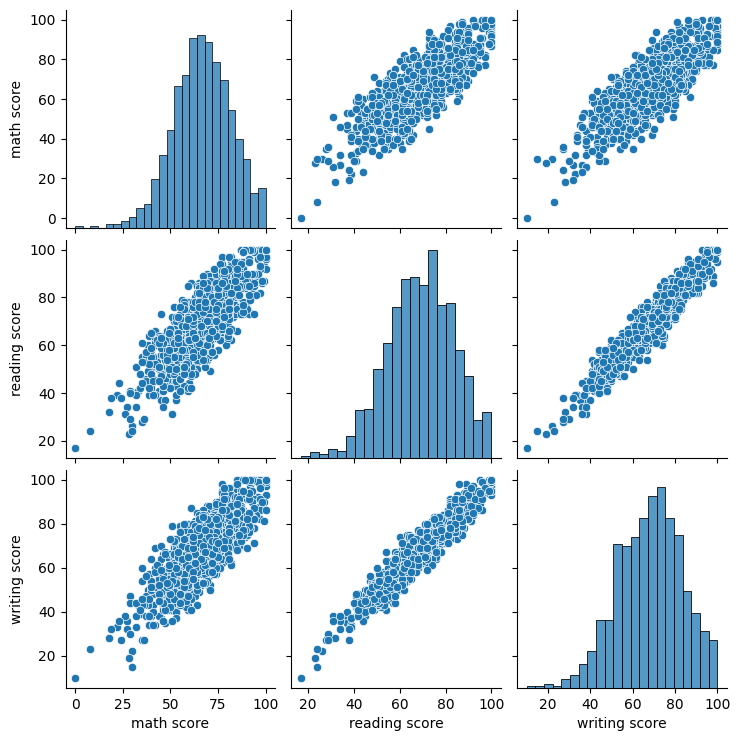

In [25]:
sns.pairplot(dataset[numerical_features])
plt.show()

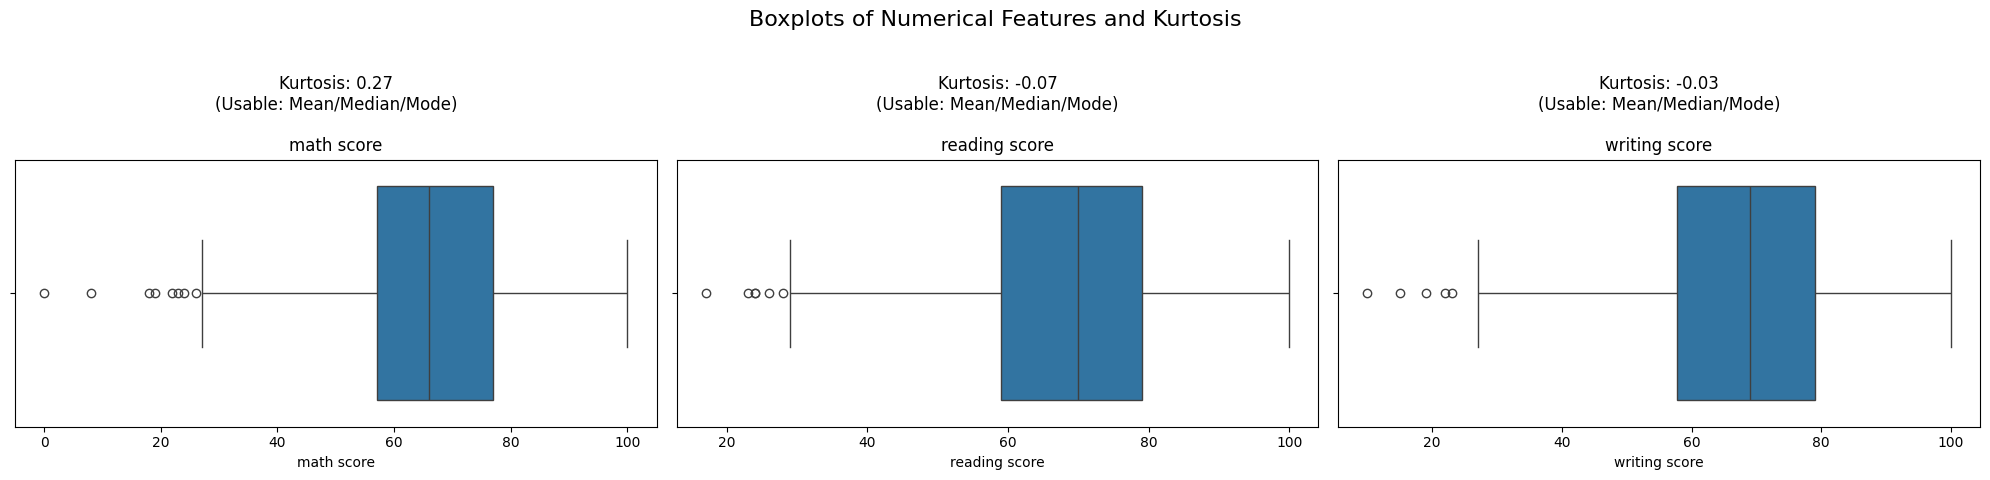

In [26]:
# Create a single figure to hold all the subplots
plt.figure(figsize=(20, 5)) 
plt.suptitle('Boxplots of Numerical Features and Kurtosis', fontsize=16)

# Loop through the first three numerical features
# enumerate gives us both the index (i) and the feature name
for i, feature in enumerate(numerical_features):
    
    # Select the subplot position (1, 2, or 3)
    plt.subplot(1, 3, i + 1)
    
    # Plot the boxplot for the current feature
    sns.boxplot(x=dataset[feature], orient='h')
    
    # Calculate kurtosis for the current feature
    kurt = dataset[feature].kurt()
    
    # Set the title based on the kurtosis
    if kurt >= 1:
        plt.title(f'Kurtosis: {kurt:.2f}\n(Unuseable: Mean)\n(Useable: Median/Mode)\n\n{feature}')
    else:
        plt.title(f'Kurtosis: {kurt:.2f}\n(Usable: Mean/Median/Mode)\n\n{feature}')

# Adjust the layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # rect adjusts for suptitle
plt.show()

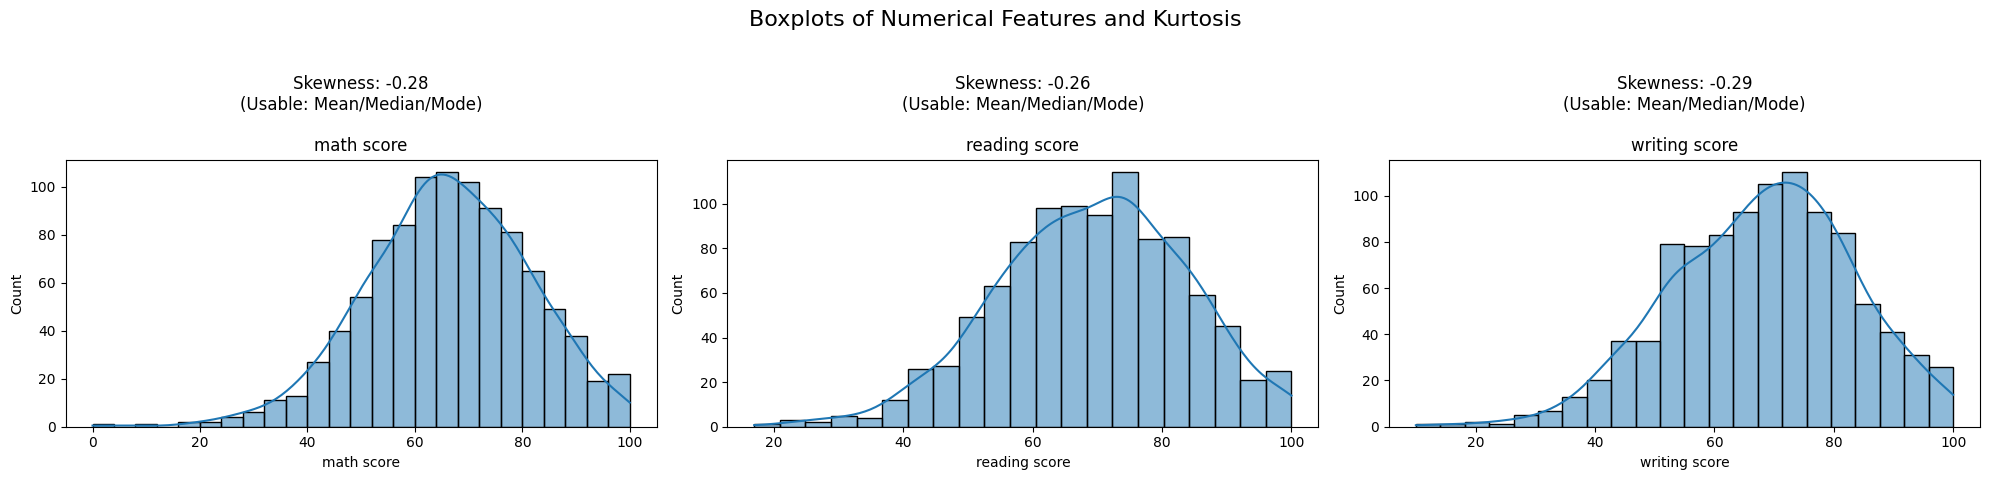

In [27]:
# Create a single figure to hold all the subplots
plt.figure(figsize=(20, 5)) 
plt.suptitle('Boxplots of Numerical Features and Kurtosis', fontsize=16)

# Loop through the first three numerical features
# enumerate gives us both the index (i) and the feature name
for i, feature in enumerate(numerical_features):
    
    # Select the subplot position (1, 2, or 3)
    plt.subplot(1, 3, i + 1)
    
    # Plot the boxplot for the current feature
    sns.histplot(x=dataset[feature], kde=True)
    
    # Calculate kurtosis for the current feature
    skewness = dataset[feature].skew()
    
    # Set the title based on the kurtosis
    if np.abs(skewness) >= 0.5:
        plt.title(f'Skewness: {skewness:.2f}\n(Unuseable: Mean)\n(Useable: Median/Mode)\n\n{feature}')
    else:
        plt.title(f'Skewness: {skewness:.2f}\n(Usable: Mean/Median/Mode)\n\n{feature}')

# Adjust the layout to prevent titles from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # rect adjusts for suptitle
plt.show()

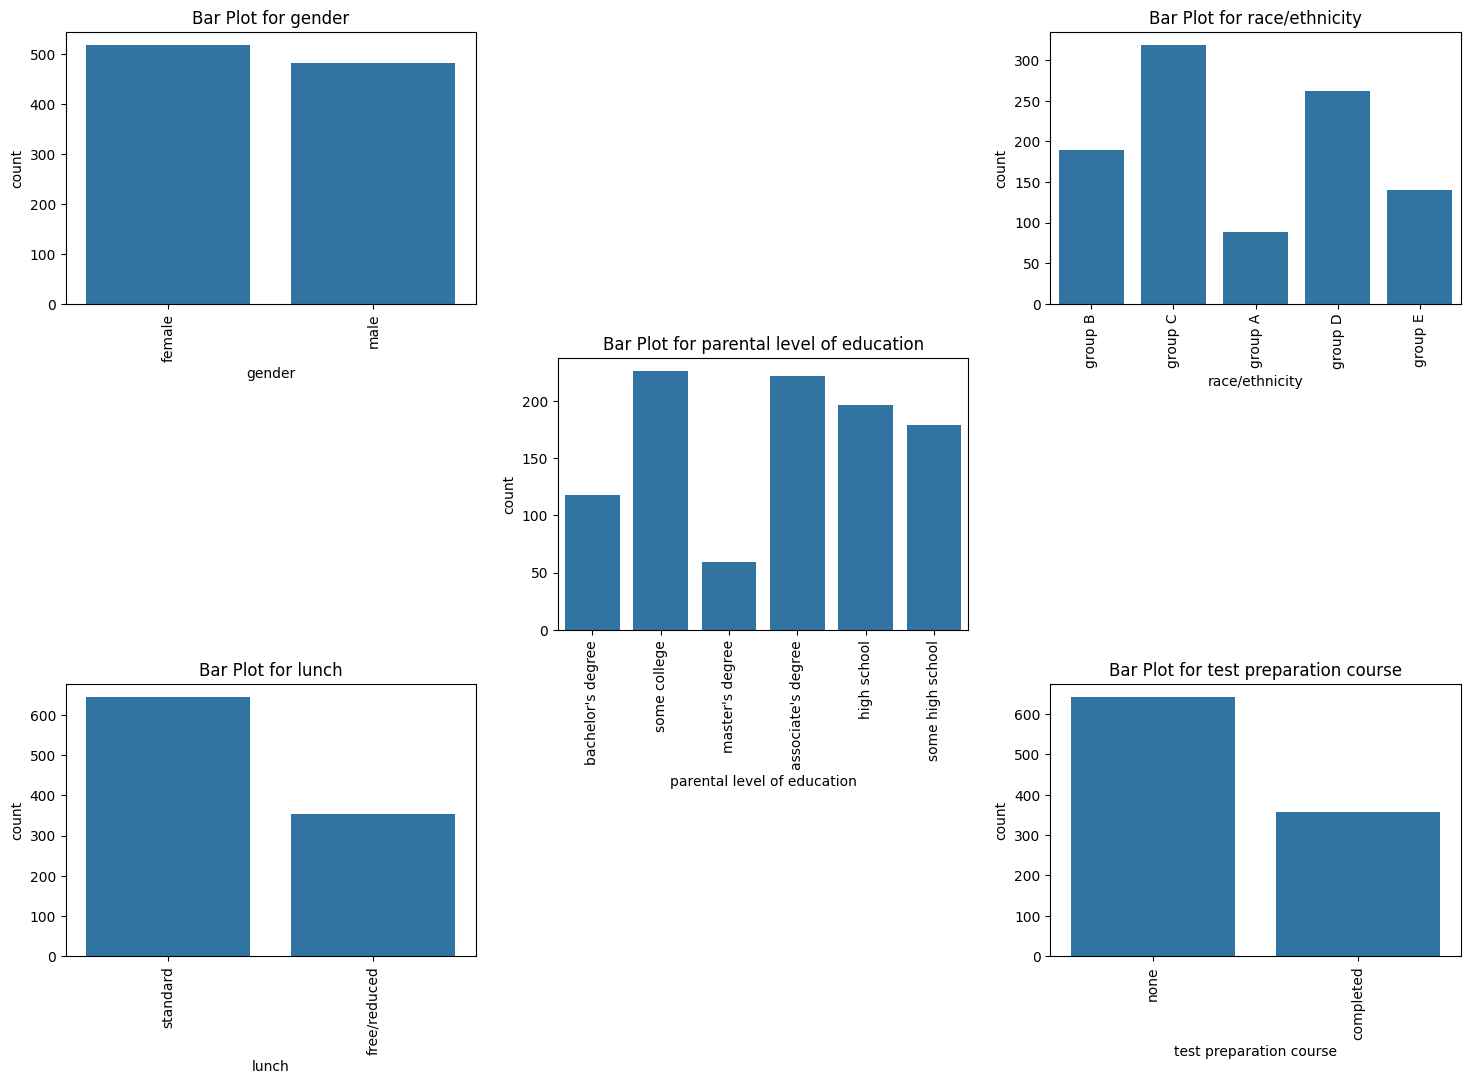

In [28]:
plt.figure(figsize=(18, 12))
i = 1
for feature in categorical_features:
    # Create a new figure for each plot to keep them separate
    # Create the count plot
    plt.subplot(3, 3, i)
    sns.countplot(x=dataset[feature])
    
    # Set a title for clarity
    plt.title(f'Bar Plot for {feature}')
    
    plt.xticks(rotation=90)

    i+=2

# Display the plot
plt.show()

In [29]:
intermediate_dataset = dataset
intermediate_dataset['Total Score'] = intermediate_dataset['math score'] + intermediate_dataset['reading score'] + intermediate_dataset['writing score']
intermediate_dataset['Average Score'] = intermediate_dataset['Total Score']/3
intermediate_dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


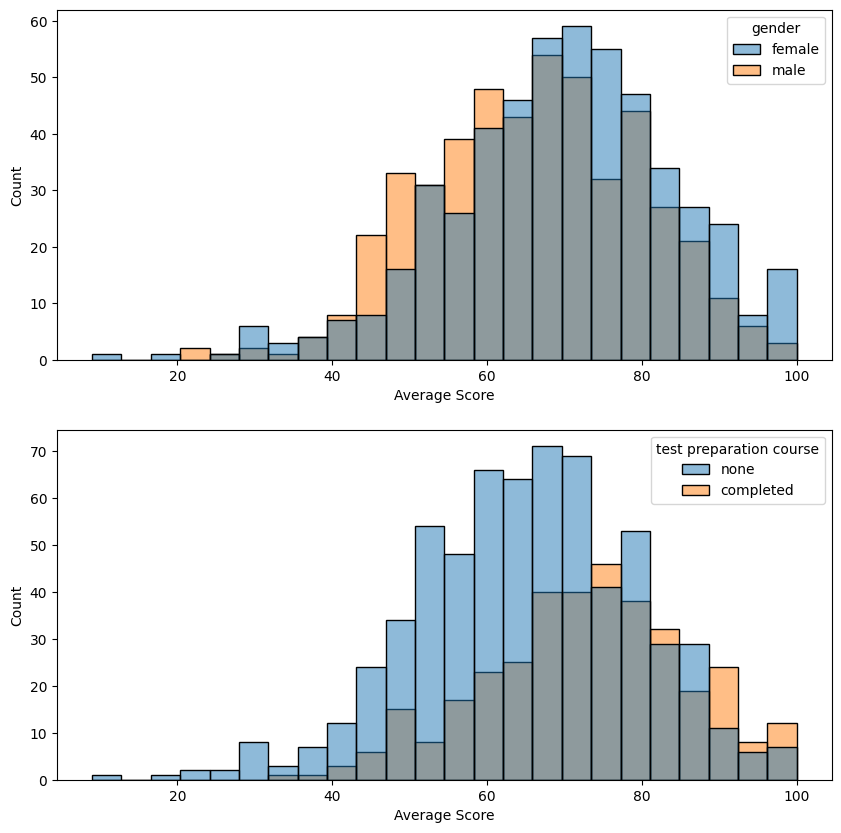

In [30]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.histplot(data=intermediate_dataset, x='Average Score', hue='gender')
plt.subplot(2, 1, 2)
sns.histplot(data=intermediate_dataset, x='Average Score', hue='test preparation course')
plt.show()

In [31]:
from sklearn.impute import SimpleImputer
print(f'Number of duplicates in the raw dataset: {dataset.isnull().sum().sum()}')

mean_imputer = SimpleImputer(strategy='mean')
# Fit and transform only the numerical columns,
# then assign the result back to those same columns in the copied DataFrame.
dataset[numerical_features] = mean_imputer.fit_transform(dataset[numerical_features])

print(f'Number of duplicates after handling duplicates in the dataset: {dataset.isnull().sum().sum()}')

Number of duplicates in the raw dataset: 0
Number of duplicates after handling duplicates in the dataset: 0


In [32]:
new_row = pd.DataFrame(
    {
        "gender": ['Male'],
        "race/ethnicity": ['Persian'],
        "parental level of education": ['Bachelor'],
        "lunch" :["None"],
        "test preparation course": ["completed"],
        "math score": [np.nan],
        "reading score": [np.nan],
        "writing score": [np.nan]
    }
)

new_row[numerical_features] = mean_imputer.transform(new_row[numerical_features])
new_row

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,Male,Persian,Bachelor,None,completed,66.089,69.169,68.054


In [33]:
for feature in numerical_features:
    print(f'{feature}\'s mean is {dataset[feature].mean()}')

math score's mean is 66.089
reading score's mean is 69.169
writing score's mean is 68.054


In [34]:
def show_outliers(df: pd.DataFrame, columns: list) -> dict:
    """
    Inspects specified columns for outliers using the IQR method and returns a report.
    """
    outlier_report = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        outlier_report[column] = outliers[column]
    return pd.DataFrame(outlier_report).fillna('Not Outlier')

outlier_info = show_outliers(dataset, numerical_features)
print(f'these indexes of dataset includes outliers: {outlier_info.index}')
outlier_info

these indexes of dataset includes outliers: Index([17, 59, 76, 145, 211, 327, 338, 466, 596, 787, 842, 980], dtype='int64')


,math score,reading score,writing score
17,18.0,Not Outlier,Not Outlier
59,0.0,17.0,10.0
76,Not Outlier,26.0,22.0
145,22.0,Not Outlier,Not Outlier
211,Not Outlier,28.0,Not Outlier
327,Not Outlier,23.0,19.0
338,24.0,Not Outlier,Not Outlier
466,26.0,Not Outlier,Not Outlier
596,Not Outlier,24.0,15.0
787,19.0,Not Outlier,Not Outlier


In [35]:
dataset.iloc[outlier_info.index][numerical_features]

,math score,reading score,writing score
17,18.0,32.0,28.0
59,0.0,17.0,10.0
76,30.0,26.0,22.0
145,22.0,39.0,33.0
211,35.0,28.0,27.0
327,28.0,23.0,19.0
338,24.0,38.0,27.0
466,26.0,31.0,38.0
596,30.0,24.0,15.0
787,19.0,38.0,32.0


In [36]:
# Remove Outliers
dataset.drop(outlier_info.index)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,218,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88.0,247,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,148,49.333333
4,male,group C,some college,standard,none,76.0,78.0,75.0,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,282,94.000000
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,172,57.333333
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,195,65.000000
998,female,group D,some college,standard,completed,68.0,78.0,77.0,223,74.333333


In [37]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,218,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88.0,247,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,148,49.333333
4,male,group C,some college,standard,none,76.0,78.0,75.0,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,282,94.000000
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,172,57.333333
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,195,65.000000
998,female,group D,some college,standard,completed,68.0,78.0,77.0,223,74.333333


In [38]:
def remove_invalid_outliers(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    removes the invalid outliers (every value out of [0, 100] range)
    """
    outliers_indexes = set()
    for column in columns:
        outliers = df[(df[column] < 0) | (df[column] > 100)]
        outliers_indexes.update(outliers.index)

    df_out = df.drop(index=list(outliers_indexes))

    return df_out

In [39]:
test_df = dataset[(dataset['math score'] < 1) | (dataset['math score'] > 99)]
test_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0,27,9.000000
149,male,group E,associate's degree,free/reduced,completed,100.0,100.0,93.0,293,97.666667
451,female,group E,some college,standard,none,100.0,92.0,97.0,289,96.333333
458,female,group E,bachelor's degree,standard,none,100.0,100.0,100.0,300,100.000000
623,male,group A,some college,standard,completed,100.0,96.0,86.0,282,94.000000
625,male,group D,some college,standard,completed,100.0,97.0,99.0,296,98.666667
916,male,group E,bachelor's degree,standard,completed,100.0,100.0,100.0,300,100.000000
962,female,group E,associate's degree,standard,none,100.0,100.0,100.0,300,100.000000


In [40]:
remove_invalid_outliers(dataset, ['math score'])

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,218,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88.0,247,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,148,49.333333
4,male,group C,some college,standard,none,76.0,78.0,75.0,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,282,94.000000
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,172,57.333333
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,195,65.000000
998,female,group D,some college,standard,completed,68.0,78.0,77.0,223,74.333333


In [41]:
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,218,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88.0,247,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,148,49.333333
4,male,group C,some college,standard,none,76.0,78.0,75.0,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0,282,94.000000
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0,172,57.333333
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0,195,65.000000
998,female,group D,some college,standard,completed,68.0,78.0,77.0,223,74.333333


In [42]:
test_df.loc[458, 'writing score'] = 102
test_df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0,27,9.000000
149,male,group E,associate's degree,free/reduced,completed,100.0,100.0,93.0,293,97.666667
451,female,group E,some college,standard,none,100.0,92.0,97.0,289,96.333333
458,female,group E,bachelor's degree,standard,none,100.0,100.0,102.0,300,100.000000
623,male,group A,some college,standard,completed,100.0,96.0,86.0,282,94.000000
625,male,group D,some college,standard,completed,100.0,97.0,99.0,296,98.666667
916,male,group E,bachelor's degree,standard,completed,100.0,100.0,100.0,300,100.000000
962,female,group E,associate's degree,standard,none,100.0,100.0,100.0,300,100.000000


In [43]:
remove_invalid_outliers(test_df, numerical_features)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
59,female,group C,some high school,free/reduced,none,0.0,17.0,10.0,27,9.000000
149,male,group E,associate's degree,free/reduced,completed,100.0,100.0,93.0,293,97.666667
451,female,group E,some college,standard,none,100.0,92.0,97.0,289,96.333333
623,male,group A,some college,standard,completed,100.0,96.0,86.0,282,94.000000
625,male,group D,some college,standard,completed,100.0,97.0,99.0,296,98.666667
916,male,group E,bachelor's degree,standard,completed,100.0,100.0,100.0,300,100.000000
962,female,group E,associate's degree,standard,none,100.0,100.0,100.0,300,100.000000


In [63]:
from sklearn.model_selection import train_test_split
X = dataset.drop('math score', axis=1)
y = dataset['math score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
categorical_features = X_train.select_dtypes(include='O').columns
numerical_features = X_train.select_dtypes(exclude='O').columns
print('Categorical Features:')
for feature in categorical_features:
    print(f"\t{feature}")
print()
print('Numerical Features:')
for feature in numerical_features:
    print(f"\t{feature}")

Categorical Features:
	gender
	race/ethnicity
	parental level of education
	lunch
	test preparation course

Numerical Features:
	reading score
	writing score


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
std_scaler = StandardScaler()
one_hot_enc = OneHotEncoder(drop='if_binary',sparse_output=False) # uses 1 row for binary encodings like gender yes/no features.
preprocessor = ColumnTransformer(
    transformers=[
        ('standard scaler', std_scaler, numerical_features),
        ('one hot encoder', one_hot_enc, categorical_features)
    ]
)

In [67]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [68]:
pd.DataFrame(X_train_preprocessed, columns= preprocessor.get_feature_names_out())

,standard scaler__reading score,standard scaler__writing score,one hot encoder__gender_male,one hot encoder__race/ethnicity_group A,one hot encoder__race/ethnicity_group B,one hot encoder__race/ethnicity_group C,one hot encoder__race/ethnicity_group D,one hot encoder__race/ethnicity_group E,one hot encoder__parental level of education_associate's degree,one hot encoder__parental level of education_bachelor's degree,one hot encoder__parental level of education_high school,one hot encoder__parental level of education_master's degree,one hot encoder__parental level of education_some college,one hot encoder__parental level of education_some high school,one hot encoder__lunch_standard,one hot encoder__test preparation course_none
0,0.030791,0.434053,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,0.930290,0.964701,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.345443,1.163694,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.176786,-0.162925,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.384363,-0.759904,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,2.106557,2.092328,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
796,-0.453555,-0.494580,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
797,-0.522747,-1.025228,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
798,-1.491438,-1.025228,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [69]:
pd.DataFrame(X_test_preprocessed, columns=preprocessor.get_feature_names_out())

,standard scaler__reading score,standard scaler__writing score,one hot encoder__gender_male,one hot encoder__race/ethnicity_group A,one hot encoder__race/ethnicity_group B,one hot encoder__race/ethnicity_group C,one hot encoder__race/ethnicity_group D,one hot encoder__race/ethnicity_group E,one hot encoder__parental level of education_associate's degree,one hot encoder__parental level of education_bachelor's degree,one hot encoder__parental level of education_high school,one hot encoder__parental level of education_master's degree,one hot encoder__parental level of education_some college,one hot encoder__parental level of education_some high school,one hot encoder__lunch_standard,one hot encoder__test preparation course_none
0,1.137866,1.031032,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-0.245978,0.301391,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.238367,0.235060,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.515136,0.301391,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.930290,0.633046,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.868708,-0.826235,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
196,-0.937901,-1.025228,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
197,0.791905,0.500384,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
198,0.515136,0.367722,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [71]:
pd.DataFrame(X_train_preprocessed, columns= preprocessor.get_feature_names_out()).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   standard scaler__reading score                                   800 non-null    float64
 1   standard scaler__writing score                                   800 non-null    float64
 2   one hot encoder__gender_male                                     800 non-null    float64
 3   one hot encoder__race/ethnicity_group A                          800 non-null    float64
 4   one hot encoder__race/ethnicity_group B                          800 non-null    float64
 5   one hot encoder__race/ethnicity_group C                          800 non-null    float64
 6   one hot encoder__race/ethnicity_group D                          800 non-null    float64
 7   one hot encoder__race/ethnicity_group E     